In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,f1_score


In [2]:

df = pd.read_csv('../../Data/complete_fire.csv')
df.head()

,unique_fire_identifier,lattitude,longitude,acres_burned,fire_cause,incident_name,IsFSAssisted,origin_county,state,year,...,area (acres),population,d0,d1,d2,d3,d4,DSCI_avg,DSCI_summed,precipitation(in)
0,2003-WYCMX-200237,-105.563067,44.603340,139.091837,Unknown,SCHWARTZ,1.0,Campbell,WY,2003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-CABDU-006784,-117.076679,34.733894,1906.698008,Unknown,MENTONE,1.0,San Bernardino,CA,2004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-IDGBK-000002,-116.216680,43.666673,685.728842,Unknown,NIFC RAMP SUPPORT,1.0,Ada,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-IDCTF-008902,-111.426912,42.096336,20.000000,Unknown,St. Charles RX,0.0,Bear Lake,ID,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-AZPNF-000975,-112.072414,34.598306,77.946287,Unknown,Mingus/Cherry Rx,0.0,Yavapai,AZ,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum().sum()

448363

In [4]:
df_clean = df.fillna(0)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical = ['object']
numdf = df_clean.copy().select_dtypes(include=numerics)
catdf = df_clean.copy().select_dtypes(include=categorical)
catdf.drop(columns=['unique_fire_identifier','incident_name'],inplace=True)
catdf.head()

,fire_cause,origin_county,state
0,Unknown,Campbell,WY
1,Unknown,San Bernardino,CA
2,Unknown,Ada,ID
3,Unknown,Bear Lake,ID
4,Unknown,Yavapai,AZ


In [6]:
# will dummify these features to obtain correlations  
dummified_1 = pd.get_dummies(data=catdf,drop_first=True) 
dummified_1 = pd.concat([numdf,dummified_1],axis=1)
print(dummified_1.shape)
dummified_1.head()

(213787, 1512)


,lattitude,longitude,acres_burned,IsFSAssisted,year,month,value,anomaly,area (acres),population,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-105.563067,44.603340,139.091837,1.0,2003,1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,-117.076679,34.733894,1906.698008,1.0,2004,7,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-116.216680,43.666673,685.728842,1.0,2008,7,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-111.426912,42.096336,20.000000,0.0,2008,9,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-112.072414,34.598306,77.946287,0.0,2008,10,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fire_class = []
for obs in df['acres_burned']:
    if 0<=obs <= 0.26:
        fire_class.append(0)
    elif 0.26 <= obs <10.0:
        fire_class.append(1)
    elif 10.0<=obs<100.0:
        fire_class.append(2)
    elif 100.0<=obs<300:
        fire_class.append(3)
    elif 300.0 <= obs <1_000:
        fire_class.append(4)
    elif 1_000.0<=obs<5_000.0:
        fire_class.append(5)
    elif 5_000.0 <= obs <10_000:
        fire_class.append(6)
    elif 10_000.0 <=obs<50_000:
        fire_class.append(7)
    elif 50_000.0<=obs<100_000:
        fire_class.append(8)
    elif 100_000.0<=obs<500_000.0:
        fire_class.append(9)
    elif 500_000.0 <= obs <1_000_000:
        fire_class.append(9)
    elif obs >= 1_000_000.0:
        fire_class.append(9)
    else:
        print(obs)
dummified_1['fire_class'] = fire_class 


In [8]:
dummified_1['fire_class'].value_counts(normalize=True)

0    0.321006
1    0.228774
2    0.147100
4    0.104478
5    0.103308
3    0.087063
7    0.003761
6    0.003218
8    0.000725
9    0.000566
Name: fire_class, dtype: float64

In [11]:
model_1 = dummified_1.drop(columns='acres_burned')
model_1=model_1.sort_values(by=['year','month'])

In [12]:
X =model_1.drop(columns = 'fire_class') 
y= model_1['fire_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)



In [108]:
fdf

NameError: name 'fdf' is not defined

In [109]:
#random_model = RandomForestClassifier(n_estimators=300, random_state = 42, n_jobs = -1,criterion = 'gini')
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
#random_model.fit(X_train,y_train)


In [110]:
preds = random_model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,12221,1994,300,125,35,28,0,1,0,0
1,7200,4759,705,302,63,21,1,2,0,0
2,2923,2197,2834,444,230,3,0,1,1,0
3,1428,817,285,1102,167,4,0,1,0,0
4,3069,829,261,125,925,849,0,2,0,0
5,4515,858,222,74,483,749,4,0,0,0
6,64,36,13,3,2,7,0,0,0,0
7,75,33,5,2,2,4,0,0,0,0
8,21,4,0,0,0,0,0,0,0,0
9,16,0,1,0,0,0,0,0,0,0


In [111]:
random_model.score(X_train,y_train),random_model.score(X_test,y_test)

(0.9993264313334165, 0.4226617022470859)

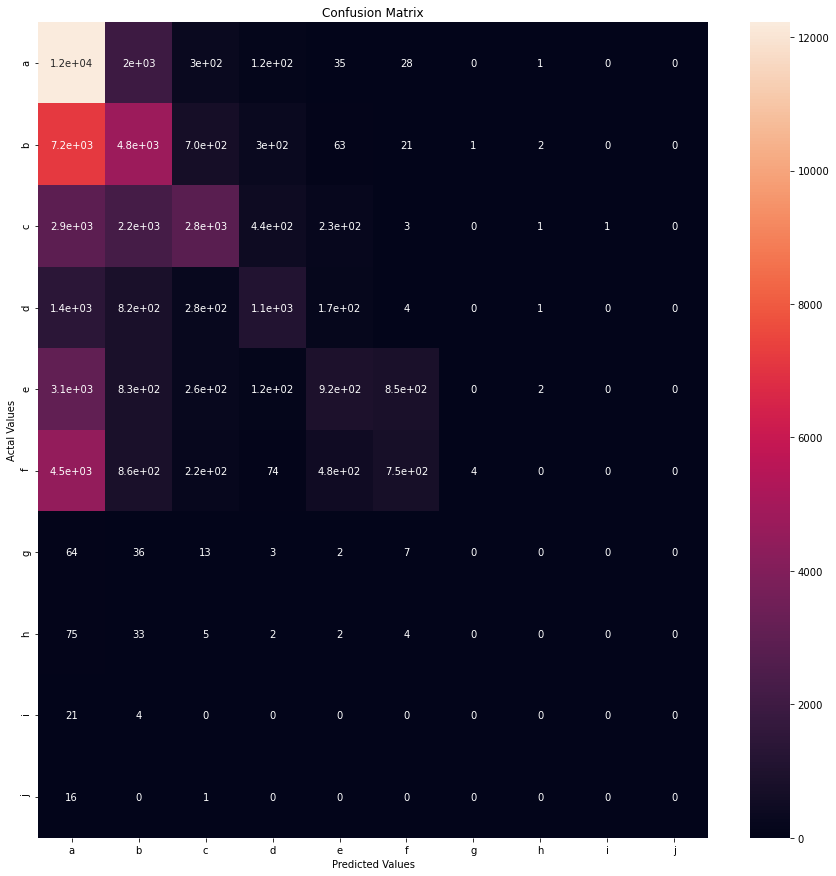

In [112]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['a','b','c','d','e','f','g','h','i','j'], 
                     columns = ['a','b','c','d','e','f','g','h','i','j'])

#Plotting the confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [113]:
#
# Average is assigned micro
#
precisionScore_sklearn_microavg = precision_score(y_test, preds, average='micro', zero_division=0)
#
# Average is assigned macro
#
precisionScore_sklearn_macroavg = precision_score(y_test, preds, average='macro')
#
f1_score_sklearn_macro = f1_score(y_test, preds, average='macro')
f1_score_sklearn_micro = f1_score(y_test, preds, average='micro')

# Printing micro and macro average precision score
#
print(precisionScore_sklearn_microavg, precisionScore_sklearn_macroavg)
f1_score_sklearn_micro,f1_score_sklearn_macro

0.4226617022470859 0.28541617004306963


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4226617022470858, 0.21188482080739307)

Feature: 0, Score: 0.20283
Feature: 1, Score: 0.19179
Feature: 2, Score: 0.02244
Feature: 3, Score: 0.01882
Feature: 4, Score: 0.05700
Feature: 5, Score: 0.02873
Feature: 6, Score: 0.02019
Feature: 7, Score: 0.01639
Feature: 8, Score: 0.02310
Feature: 9, Score: 0.01854
Feature: 10, Score: 0.01677
Feature: 11, Score: 0.01387
Feature: 12, Score: 0.00835
Feature: 13, Score: 0.00205
Feature: 14, Score: 0.01889
Feature: 15, Score: 0.01922
Feature: 16, Score: 0.02506
Feature: 17, Score: 0.01825
Feature: 18, Score: 0.00858
Feature: 19, Score: 0.04832
Feature: 20, Score: 0.00083
Feature: 21, Score: 0.00037
Feature: 22, Score: 0.00044
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00005
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00005
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.00024
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00010
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00002
Fe

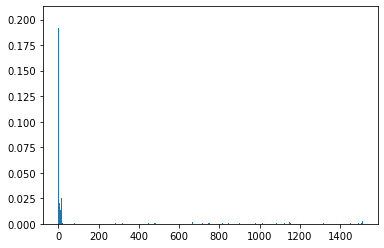

In [114]:
# get importance LINKN https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = random_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [13]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
# fit model no training data 
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:

model = XGBClassifier()
# fit the model
#model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()